<a href="https://colab.research.google.com/github/Jorge-LGH/Learn_Python/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

Pandas es una biblioteca de análisis de datos que proporciona estructuras de datos flexibles y eficientes para trabajar con conjuntos de datos tabulares. Es utilizada en áreas como ciencia de datos y ofrece una amplia gama de funciones para manipular, limpiar, transformar y analizar información. Como siempre, es ideal visitar la [documentación oficial](https://pandas.pydata.org) de la librería si buscas información más detallada.

<img src = "https://imgv2-1-f.scribdassets.com/img/document/344994698/original/f2f4698fcd/1613115148?v\u003d1">

Ahora, puede que parezcan similares los arrays y dataframes que habíamos visto, pero en teoría deberías de saber la diferencia si estás en este repositorio. No obstante, veremos unas cuantas diferencias solo para recordar... aunque no lo deberías de necesitar.

- Estructura de datos: Un DataFrame de Pandas es una estructura de datos bidimensional que se asemeja a una tabla con filas y columnas etiquetadas. Por otro lado, un array de NumPy es una estructura de datos multidimensional que puede tener cualquier número de dimensiones, generalmente utilizado para almacenar datos numéricos de manera eficiente.

- Etiquetas de fila y columna: Los DataFrames de Pandas tienen etiquetas para las filas y columnas, lo que permite un acceso más intuitivo a los datos. Los arrays de NumPy, en cambio, no tienen estas etiquetas y se accede a los datos mediante índices numéricos.

- Tipos de datos: Los DataFrames de Pandas pueden contener diferentes tipos de datos en cada columna, como números, cadenas de texto, fechas, etc. Los arrays de NumPy están diseñados para contener datos homogéneos, lo que significa que todos los elementos del array deben ser del mismo tipo de datos.

# Dataframes


## Crear dataframes

Existen una variedad de maneras para generar Dataframes haciendo uso de la librería Pandas en Python. A continuación se muestran algunas de las maneras más utilizadas para generar estas estructuras de datos y algunos ejemplos de cómo es su sintaxis.

1. A partir de un diccionario: Puedes generar un dataframe a partir de diccionarios o conjuntos de arrays con la función `pd.DataFrame()`. Cada llave va a representar una columna, los valores de las llaves serán los valores en cada renglón. Pandas también alineará los datos según las llaves en el diccionario.



In [ ]:
import pandas as pd

data = {
    'Name': ['John', 'Jane', 'Sara', 'Mike'],
    'Age': [25, 30, 28, 35],
    'City': ['New York', 'London', 'Paris', 'Tokyo']
}

df = pd.DataFrame(data)

print(df)
print(type(df))

   Name  Age      City
0  John   25  New York
1  Jane   30    London
2  Sara   28     Paris
3  Mike   35     Tokyo
<class 'pandas.core.frame.DataFrame'>


2. A partir de un array de NumPy: Puedes generar un dataframe a partir de arrays directamente creados con NumPy, siempre y cuando especifiques los nuevos nombres para las columnas. El número de renglones en tu columna será acorde a la forma de los arrays que se den como un input.

In [ ]:
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
columns = ['A', 'B', 'C']

df = pd.DataFrame(arr, columns=columns)

print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


3. A partir de un archivo CSV: Tal como en R, es frecuente cargar archivos csv previamente generados para poder manipularlos a voluntad. Se debe de especificar siempre el path o URL del archivo con la función `pd.read_csv()`.

```python
import pandas as pd

df = pd.read_csv('data.csv')
```

Existen más formas de generar nuestros dataframes; sin embargo, estos tres son los más comunes para hacerlo.

## Reshape Dataframes

Hacer el reshaping de un dataframe es crucial para algunos pipelines y para algunas operaciones dentro de Python, es por ello que Python cuenta con una variedad de funciones que nos ayudan a lograrlo eficientemente.

Recuerda que puede ser necesario hacer el reshaping para preparar tus datos, visualizarlos e incluso para agregar mpas ifnromación; así que no olvides cómo hacerlo.

### `pivot()`

Esta función te permite organizar un dataframe previo y asignar un nuevo index según una variable. Además, permite asignar columnas y los valores en las mismas.

In [ ]:
# Generar datafrmae a partir de diccionario
df = pd.DataFrame({
    'Nombre': ['Juan', 'Juan', 'María', 'María'],
    'Materia': ['Mate', 'Biología', 'Mate', 'Biología'],
    'Calificación': [80, 90, 85, 95]
})

# Uso de pivot
pivot_df = df.pivot(index='Nombre', columns='Materia', values='Calificación')

print(df)
print(" ")
print(pivot_df)

  Nombre   Materia  Calificación
0   Juan      Mate            80
1   Juan  Biología            90
2  María      Mate            85
3  María  Biología            95
 
Materia  Biología  Mate
Nombre                 
Juan           90    80
María          95    85


### `melt()`

Esta función tiene un efecto contrario a la explicada anteriormente. En este caso, `melt()` desagrega un dataframe desde un formato amplio (*wide*) a un formato largo (*long*), opcionalmente manteniendo los identificadores establecidos.

In [ ]:
# Generar datafrmae a partir de diccionario
df = pd.DataFrame({
    'Nombre': ['Juan', 'María'],
    'Mate': [80, 85],
    'Biología': [90, 95]
})

# Hacer melt al dataframe
melted_df = df.melt(id_vars='Nombre', var_name='Materia', value_name='Calificación')

print(df)
print(" ")
print(melted_df)

  Nombre  Mate  Biología
0   Juan    80        90
1  María    85        95
 
  Nombre   Materia  Calificación
0   Juan      Mate            80
1  María      Mate            85
2   Juan  Biología            90
3  María  Biología            95


### `set_index()` y `stack()`

La primera de estas dos funciones, `set_index()`, sirve para usar una columna existente como el index de nuestro dataframe. Por otro lado, `stack()`, apila los niveles de las columnas al index.

In [ ]:
# Generar datafrmae a partir de diccionario
df = pd.DataFrame({
    'Nombre': ['Juan', 'María'],
    'Mate': [80, 85],
    'Biología': [90, 95]
})

# Stack el dataframe según una variable
stacked_df = df.set_index('Nombre').stack()
unstacked_df = stacked_df.unstack()

print(df)
print(" ")
print(stacked_df)
print(" ")
print(unstacked_df)

  Nombre  Mate  Biología
0   Juan    80        90
1  María    85        95
 
Nombre          
Juan    Mate        80
        Biología    90
María   Mate        85
        Biología    95
dtype: int64
 
        Mate  Biología
Nombre                
Juan      80        90
María     85        95


### `merge()`

Esta función, tal como indica su nombre, une dataframes u objetos de serie en una base de datos nueva.

In [ ]:
# Generar datafrmae a partir de diccionario
df1 = pd.DataFrame({'Nombre': ['Juan', 'María'], 'Edad': [22, 30]})
df2 = pd.DataFrame({'Nombre': ['Juan', 'María'], 'Ciudad': ['Querétaro', 'Guanajuato']})

# unir los dataframes según una variable en común
merged_df = pd.merge(df1, df2, on='Nombre')

print(df1)
print(" ")
print(df2)
print(" ")
print(merged_df)

  Nombre  Edad
0   Juan    22
1  María    30
 
  Nombre      Ciudad
0   Juan   Querétaro
1  María  Guanajuato
 
  Nombre  Edad      Ciudad
0   Juan    22   Querétaro
1  María    30  Guanajuato


## Hacer subset de Dataframes

Es igualmente obvio el porqué es importante saber hacer subsets de nuestros datos, pues en ocasiones solo requerimos extraer porciones específicas de la información.

### Seleccionar columnas

En este caso se muestra la selección de una lista de columnas para extraer información.

In [ ]:
df = merged_df*1

subset = df[['Nombre', 'Edad']] # Todos los renglones de estas dos columnas
print(subset)

  Nombre  Edad
0   Juan    22
1  María    30


### Seleccionar renglones

Se muestra la selección de renglones con base en una condición.

In [ ]:
df = merged_df*1

subset = df[df['Edad'] > 25]
print(subset)

  Nombre  Edad      Ciudad
1  María    30  Guanajuato


### `loc()`

Este elemento de Python funciona para especificar tanto renglones como columnas específicas; incluyendo condiciones de selección.

In [ ]:
df = merged_df*1

subset = df.loc[df['Edad'] > 25, ['Nombre', 'Ciudad']]
print(subset)

  Nombre      Ciudad
1  María  Guanajuato


### `iloc()`

Es el mismo principio que `loc()` con la diferencia que podemos escoger posiciones dentro del index de nuestros objetos.

In [ ]:
df = merged_df*1

subset = df.iloc[0:2, 1:3]
print(subset)

   Edad      Ciudad
0    22   Querétaro
1    30  Guanajuato


## Agrupar datos

Ahora, en lugar de hacer divisiones en nuestros datos, veremos cómo agruparlos según sea nuestro interés. Pandas es una herramienta muy eficiente para generar agrupaciones y poder manipular los datos directamente, de modo que es necesario saber cómo utilizarlo.



### `groupby()`

Esta es una de las funciones más útiles en Pandas, pues nos permite agrupar la información contenida en los dataframes. Funciona de modo que alimentas una columna, o lista de columnas, que agrupa tus datos y los aloja en un objeto con una gran cantidad de métodos y funciones disponibles.

In [ ]:
df = pd.DataFrame({
    'Nombre': ['Juan', 'María', 'Sara', 'Miguel'],
    'Edad': [25, 30, 28, 35],
    'Ciudad': ['Querétaro', 'Guanajuato', 'Querétaro', 'Guanajuato']
})

grouped = df.groupby('Ciudad') # agrupa por ciudad
average_age = grouped['Edad'].mean() # promedio de edad según grupos generados


print(grouped.groups) # muestra los grupos que se generan
print(average_age)

{'Guanajuato': [1, 3], 'Querétaro': [0, 2]}
Ciudad
Guanajuato    32.5
Querétaro     26.5
Name: Edad, dtype: float64


In [ ]:
df = pd.DataFrame({
    'Nombre': ['Juan', 'María', 'Sara', 'Miguel', "Mario", "Fernanda", "Berenice", "Luis"],
    'Edad': [25, 30, 28, 35, 25, 52, 37, 21],
    'Ciudad': ['Querétaro', 'Guanajuato', 'Querétaro', 'Guanajuato', 'Querétaro', 'Guanajuato', 'Querétaro', 'Guanajuato'],
    'Género': ['H', 'M', 'M', 'H', "H", "M", "M", "H"]
})

grouped = df.groupby(['Ciudad', 'Género'])
average_age = grouped['Edad'].mean()

print(grouped.groups) # muestra los grupos que se generan
print(average_age)

{('Guanajuato', 'H'): [3, 7], ('Guanajuato', 'M'): [1, 5], ('Querétaro', 'H'): [0, 4], ('Querétaro', 'M'): [2, 6]}
Ciudad      Género
Guanajuato  H         28.0
            M         41.0
Querétaro   H         25.0
            M         32.5
Name: Edad, dtype: float64


# Ejercicios

```python
# Dataframe de trabajo y librerías

import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Name': ['John', 'Jane', 'Sara', 'Mike', 'David', 'Emily', 'Daniel', 'Olivia', 'Sophia', 'Noah'],
    'Age': [25, 30, 28, 35, 42, 27, 31, 29, 33, 26],
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Sydney', 'Rome', 'Madrid', 'Beijing', 'Moscow']
}

df = pd.DataFrame(data)
```

Ejercicio 1: Selección y Filtrado de Datos

- Accede a la columna 'Name' del DataFrame.
- Filtra el DataFrame para incluir solo las filas donde la edad sea mayor o igual a 30.
- Filtra el DataFrame para incluir solo las filas donde la ciudad sea 'London' o 'Paris'.

Ejercicio 2: Agregación y datos exploratorios

- Calcula la edad promedio de las personas en el DataFrame.
- Determina la edad máxima entre las personas.
- Encuentra la cantidad de personas que viven en cada ciudad única.

Ejercicio 3: Manipulación de Datos y Visualización

Agrega una nueva columna al DataFrame llamada 'Country' con los valores ['USA', 'UK', 'France', 'Japan', 'Germany', 'Australia', 'Italy', 'Spain', 'China', 'Russia'].
Ordena el DataFrame en orden descendente según la columna 'Age'.
Crea un gráfico de barras para visualizar la distribución de edades en el DataFrame.

Ejercicio 4: Selección de Columnas

Selecciona la columna 'Name' del DataFrame y guárdala en una variable.
Crea un nuevo DataFrame que contenga solo las columnas 'Name' y 'Age'.
Calcula la edad promedio de las personas en ese nuevo DataFrame.

Ejercicio 5: Filtrado de Filas

Filtra el DataFrame para incluir solo las filas donde la edad sea mayor a 30.
Crea un nuevo DataFrame que contenga solo las filas de personas que viven en 'London' o 'Paris'.
Calcula la cantidad de personas en ese nuevo DataFrame.

Ejercicio 6: Agrupación de Datos

Agrupa los datos en el DataFrame según una columna específica y realizar cálculos sobre los grupos:

- Agrupa los datos en el DataFrame por la columna 'City'.
- Calcula la edad promedio de las personas en cada grupo.
- Calcula la cantidad de personas en cada grupo.
- Muestra los resultados obtenidos.

# Soluciones

In [25]:
# Dataframe de trabajo y librerías

import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Name': ['John', 'Jane', 'Sara', 'Mike', 'David', 'Emily', 'Daniel', 'Olivia', 'Sophia', 'Noah'],
    'Age': [25, 35, 28, 35, 42, 27, 31, 29, 33, 26],
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Sydney', 'Rome', 'Madrid', 'Beijing', 'Moscow']
}

df = pd.DataFrame(data)

print(df)

     Name  Age      City
0    John   25  New York
1    Jane   35    London
2    Sara   28     Paris
3    Mike   35     Tokyo
4   David   42    Berlin
5   Emily   27    Sydney
6  Daniel   31      Rome
7  Olivia   29    Madrid
8  Sophia   33   Beijing
9    Noah   26    Moscow


In [30]:
# Acceso a la columna 'Name'
nombres = df['Name']

# Filtrado por edad
filtro_edad = df['Age'] >= 30
datos_filtrados_edad = df[filtro_edad]

# Filtrado por ciudad
filtro_ciudad = df['City'].isin(['London', 'Paris'])
datos_filtrados_ciudad = df[filtro_ciudad]

print(datos_filtrados_ciudad)
print("")
print(datos_filtrados_edad)

   Name  Age    City Country
1  Jane   35  London      UK
2  Sara   28   Paris  France

     Name  Age     City  Country
1    Jane   35   London       UK
3    Mike   35    Tokyo    Japan
4   David   42   Berlin  Germany
6  Daniel   31     Rome    Italy
8  Sophia   33  Beijing    China


In [29]:
# Edad promedio
edad_promedio = df['Age'].mean()

# Edad máxima
edad_maxima = df['Age'].max()

# Cantidad de personas por ciudad
personas_por_ciudad = df['City'].value_counts()

print(edad_promedio)
print("")
print(edad_maxima)
print("")
print(personas_por_ciudad)

31.1

42

New York    1
London      1
Paris       1
Tokyo       1
Berlin      1
Sydney      1
Rome        1
Madrid      1
Beijing     1
Moscow      1
Name: City, dtype: int64


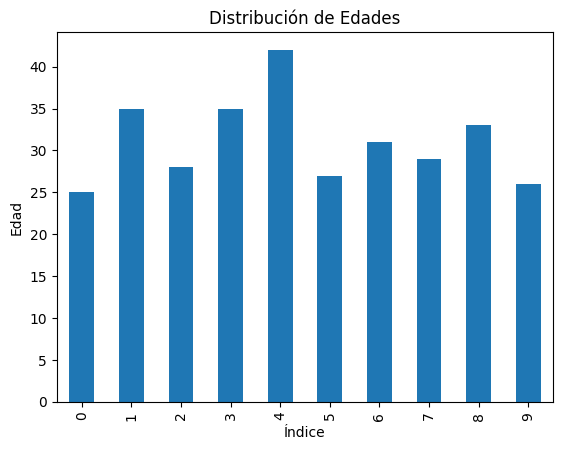

In [28]:
import matplotlib.pyplot as plt

# Agregar nueva columna 'Country'
df['Country'] = ['USA', 'UK', 'France', 'Japan', 'Germany', 'Australia', 'Italy', 'Spain', 'China', 'Russia']

# Ordenar por edad descendente
df_ordenado = df.sort_values('Age', ascending=False)

# Gráfico de barras para distribución de edades
df['Age'].plot(kind='bar')
plt.xlabel('Índice')
plt.ylabel('Edad')
plt.title('Distribución de Edades')
plt.show()


In [27]:
# Selección de columna 'Name'
nombres = df['Name']

# Nuevo DataFrame con columnas 'Name' y 'Age'
nuevo_df = df[['Name', 'Age']]

# Cálculo de edad promedio
edad_promedio = nuevo_df['Age'].mean()

print(nuevo_df)
print("")
print(edad_promedio)

     Name  Age
0    John   25
1    Jane   35
2    Sara   28
3    Mike   35
4   David   42
5   Emily   27
6  Daniel   31
7  Olivia   29
8  Sophia   33
9    Noah   26

31.1


In [26]:
# Filtrado por edad
filtro_edad = df['Age'] > 30
df_filtrado_edad = df[filtro_edad]

# Nuevo DataFrame con filas de 'London' y 'Paris'
nuevo_df_ciudades = df_filtrado_edad[df_filtrado_edad['City'].isin(['London', 'Paris'])]

# Cálculo de cantidad de personas
cantidad_personas = len(nuevo_df_ciudades)

print(df_filtrado_edad)
print("")
print(nuevo_df_ciudades)
print("")
print("Cantidad:",cantidad_personas)

     Name  Age     City
1    Jane   35   London
3    Mike   35    Tokyo
4   David   42   Berlin
6  Daniel   31     Rome
8  Sophia   33  Beijing

   Name  Age    City
1  Jane   35  London

Cantidad: 1


In [31]:
# Agrupación por la columna 'City'
grupos_ciudad = df.groupby('City')

# Cálculo de edad promedio por grupo
edad_promedio = grupos_ciudad['Age'].mean()

# Cálculo de cantidad de personas por grupo
cantidad_personas = grupos_ciudad.size()

# Muestra de resultados
print("Edad promedio por ciudad:")
print(edad_promedio)
print("\nCantidad de personas por ciudad:")
print(cantidad_personas)


Edad promedio por ciudad:
City
Beijing     33.0
Berlin      42.0
London      35.0
Madrid      29.0
Moscow      26.0
New York    25.0
Paris       28.0
Rome        31.0
Sydney      27.0
Tokyo       35.0
Name: Age, dtype: float64

Cantidad de personas por ciudad:
City
Beijing     1
Berlin      1
London      1
Madrid      1
Moscow      1
New York    1
Paris       1
Rome        1
Sydney      1
Tokyo       1
dtype: int64
